<a href="https://colab.research.google.com/github/YongwanJoo/Deep-Learning-study/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

dataset = pd.read_csv("/content/sample_data/Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
import sympy as sp

learning_rate = 0.01
epoch = 1000

#함수 선언에 필요한 variable선언(parameter(a,b), in_feature(x), label(y))
x,y,a,b = sp.symbols("x y a b")
#각 파라미터에 대한 초기값 선언
tmp_a = 9000
tmp_b = 10000

#add here
#1차함수 생성
f = a*x + b
#add here
#1차함수를 이용하여 MSE 함수 생성
l = (f - y) ** 2
#add here
partial_derivative_a = sp.diff(l,a)
partial_derivative_b = sp.diff(l,b)
#각 parameter에 대한
#경사하강법의 횟수 생성
for E in range(epoch):
  #경사하강법으로 파라미터 업데이트
  #모든 데이터에 대한 gradient연산 후 평균을 내서 업데이트
  gradient_a_list = []
  gradient_b_list = []
  for i in range(len(dataset)):
    #데이터 하나씩 사용하여 gradient 연산 후 저장
    data_x, data_y = dataset.loc[i,"YearsExperience"], dataset.loc[i,"Salary"]

    #add here
    #gradient 연산
    gradient_a = partial_derivative_a.subs({x:data_x, y:data_y, a:tmp_a, b:tmp_b})
    gradient_b = partial_derivative_b.subs({x:data_x, y:data_y, a:tmp_a, b:tmp_b})
    #저장
    gradient_a_list.append(gradient_a)
    gradient_b_list.append(gradient_b)

  #gradient의 평균을 내어 최종 gradient구하기
  gradient_a = sum(gradient_a_list)/len(dataset)
  gradient_b = sum(gradient_b_list)/len(dataset)

  #add here
  #parameter에 gradient update하기(tmp_a에 기울기와 lr을 빼서 업데이트하기)
  tmp_a = tmp_a - gradient_a*learning_rate
  tmp_b = tmp_b - gradient_b*learning_rate
  print(f"a = {tmp_a}, b = {tmp_b}")

a = 11002.3073333333, b = 10363.6600000000
a = 11523.6410148889, b = 10507.2682740444
a = 11654.1798952421, b = 10592.6039900480
a = 11681.6189266936, b = 10662.3610600460
a = 11681.8798578511, b = 10727.8071342351
a = 11674.9980954476, b = 10791.9165586561
a = 11666.2608010603, b = 10855.4750965401
a = 11657.0631171042, b = 10918.6909468166
a = 11647.7730938018, b = 10981.6198873027
a = 11638.4877352092, b = 11044.2774687886
a = 11629.2325175969, b = 11106.6686227513
a = 11620.0140417769, b = 11168.7954747596
a = 11610.8339278992, b = 11230.6594064249
a = 11601.6924822464, b = 11292.2615995583
a = 11592.5896648885, b = 11353.6031797871
a = 11583.5253450418, b = 11414.6852544692
a = 11574.4993684551, b = 11475.5089227134
a = 11565.5115751909, b = 11536.0752780380
a = 11556.5618043156, b = 11596.3854090869
a = 11547.6498951346, b = 11656.4403998333
a = 11538.7756875170, b = 11716.2413296470
a = 11529.9390219784, b = 11775.7892733272
a = 11521.1397397011, b = 11835.0853011251
a = 11512.3

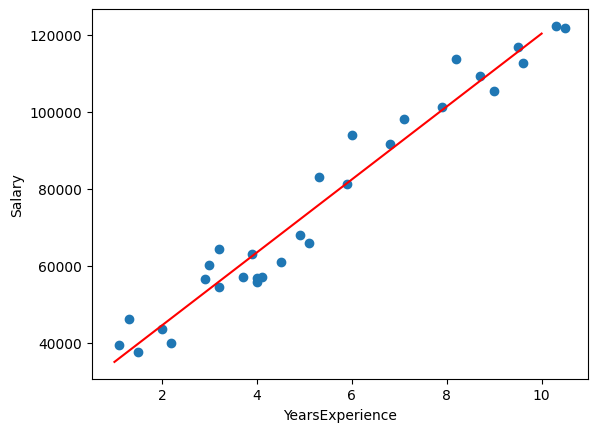

In [5]:
# prompt: dataset에 대한 scatter와 tmp_a와 tmp_b에 대한 line visualization

import matplotlib.pyplot as plt

# Scatter plot for the dataset
plt.scatter(dataset["YearsExperience"], dataset["Salary"])

# Line plot for the linear regression model
x_values = range(int(min(dataset["YearsExperience"])), int(max(dataset["YearsExperience"])) + 1)
y_values = [tmp_a * x + tmp_b for x in x_values]
plt.plot(x_values, y_values, color="red")

# Label the axes and show the plot
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()